# Clustering TCR Sequences

Following featurization of the TCRSeq data, users will often want to cluster the TCRSeq data to identify possible antigen-specific clusters of sequences. In order to do this, we have provided multiple ways for clustering your TCR sequences.

## Phenograph Clustering

The first method we will explore is using a network-graph based clustering algorithm called Phenograph (https://github.com/jacoblevine/PhenoGraph). This method automatically determines the number of clusters in the data by maximizing the modularity of the network-graph asssembled from the data. Of note, this algorithm is very fast and will be useful for when there are possibly thousands to tens of thouands of sequences to cluster. However, clusters by this method tend to be quite large.

First, we will load data and train the VAE.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False)


We will then run the clustering command.

In [2]:
DTCRU.Cluster(clustering_method='phenograph')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.7154645919799805 seconds
Jaccard graph constructed in 0.7795383930206299 seconds
Wrote graph to binary file in 0.26288819313049316 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.864216
After 2 runs, maximum modularity is Q = 0.865825
Louvain completed 22 runs in 4.592194318771362 seconds
PhenoGraph complete in 8.362215518951416 seconds
Clustering Done


Following clustering, we can view the clustering solutions by looking at the object variable called Cluster_DFs.

In [3]:
DFs = DTCRU.Cluster_DFs
print(DFs[0])

     index Alpha_Sequences   Beta_Sequences V_alpha J_alpha      V_beta  \
0        1            None    CASSIGDYAEQFF    None    None  TCRBV19-01   
1        4            None     CASSPGMLEQYF    None    None  TCRBV19-01   
2        5            None    CASSIGDSYEQYF    None    None  TCRBV19-01   
3        9            None  CASSIDTGGFYEQYF    None    None  TCRBV19-01   
4       10            None   CASSPGQYYAEQFF    None    None  TCRBV19-01   
..     ...             ...              ...     ...     ...         ...   
170   2352            None   CASSMPGGAYEQYF    None    None  TCRBV19-01   
171   2357            None   CASSLRGANERLFF    None    None  TCRBV15-01   
172   2431            None    CASSINRGNTLYF    None    None  TCRBV19-01   
173   2433            None    CASSIRKNTEVFF    None    None  TCRBV19-01   
174   2434            None    CASSIRNYAEQFF    None    None  TCRBV19-01   

    D_beta      J_beta  Frequency   Labels             Sample           HLA  
0     None  TCRBJ02-0

We can also choose to save these results to a directory called Name of object + '_Results' by setting the write_to_sheets parameter to True. There, we can find the proportions of every sample in each cluster and csv files for every cluster detailing the sequence information with other information as well.

In [4]:
DTCRU.Cluster(clustering_method='phenograph',write_to_sheets=True)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.7595582008361816 seconds
Jaccard graph constructed in 0.8318500518798828 seconds
Wrote graph to binary file in 0.22288870811462402 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.864941
After 2 runs, maximum modularity is Q = 0.866201
Louvain completed 22 runs in 4.6771721839904785 seconds
PhenoGraph complete in 8.503629922866821 seconds
Clustering Done


We can also employ two other clustering algorithms (hierarchical clustering and DBSCAN). For these types of methods, we can either control the settings for the algorithm such as the threshold parameter (t), the criterion/linkage algorithm for heirarchical clustering, or we can allow the method to determine the optimal threshold parameter by maximizing the silhoutte score of the clustering solution. First, if we run hierarchial clustering letting the program determing the right threshold parameters:

## Hierarchical Clustering

In [5]:
DTCRU.Cluster(clustering_method='hierarchical')

Clustering Done


Or we can set the parameters ourselves.

In [6]:
DTCRU.Cluster(clustering_method='hierarchical',criterion='distance',t=1.0)

Clustering Done


## DBSCAN clustering

And to use DBSCAN...

In [7]:
DTCRU.Cluster(clustering_method='dbscan')

Clustering Done


In the case there are perhaps too many sequences to efficiently cluster the data quickly, one can downsample the data and then use a k-nearest neighbor algorithm to classify the rest of the sequences like so .Here, we will downsample 500 sequenes for clustering and then assign the rest via KNN.

In [8]:
DTCRU.Cluster(clustering_method='phenograph',sample=500)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.12490582466125488 seconds
Jaccard graph constructed in 0.15070366859436035 seconds
Wrote graph to binary file in 0.1392967700958252 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.610968
After 3 runs, maximum modularity is Q = 0.614751
After 12 runs, maximum modularity is Q = 0.619389
Louvain completed 32 runs in 6.198317289352417 seconds
PhenoGraph complete in 6.621154069900513 seconds
Clustering Done


Finally, we can visualize the clustering results through a UMAP representation of the sequences.

## Clustering Visualization

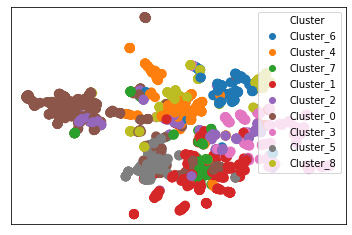

In [9]:
DTCRU.UMAP_Plot(by_cluster=True)

For full description of options for clustering, see Documentation.